# NAME: MOHD MUFASSIR

# Task:-2 Prediction using Unsupervised ML
**From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.**

In [134]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [142]:
df=pd.read_csv("iris.csv")
df.drop(['Id','Species'],axis=1,inplace=True)
df.columns=['Sepal_Length (Cm)','Sepal_Width (Cm)','Petal_Length (Cm)','Petal_Width (Cm)']

In [143]:
df.head(5)

,Sepal_Length (Cm),Sepal_Width (Cm),Petal_Length (Cm),Petal_Width (Cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sepal_Length (Cm)  150 non-null    float64
 1   Sepal_Width (Cm)   150 non-null    float64
 2   Petal_Length (Cm)  150 non-null    float64
 3   Petal_Width (Cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [147]:
df.describe()

,Sepal_Length (Cm),Sepal_Width (Cm),Petal_Length (Cm),Petal_Width (Cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [145]:
df.isna().sum()

Sepal_Length (Cm)    0
Sepal_Width (Cm)     0
Petal_Length (Cm)    0
Petal_Width (Cm)     0
dtype: int64

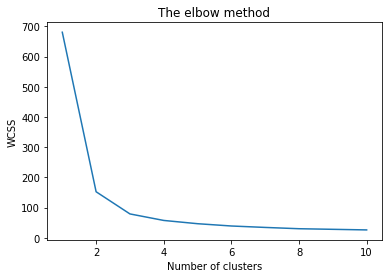

In [148]:
#Finding the optimum number of clusters for K-Means Cassification
x = df.values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0 )
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [149]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=10, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)

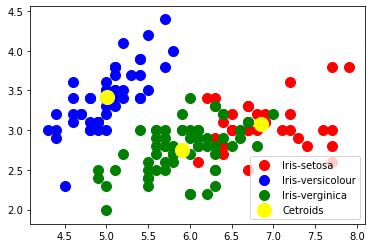

In [150]:
#Visualising the clusters - on the first two columns
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green', label='Iris-verginica')

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='yellow', label='Cetroids')
plt.legend()
plt.show()